In [1]:
import numpy as np
import pandas as pd
import time as time
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, Image
from scipy.spatial.distance import pdist, squareform


In [108]:
filepath = '/Users/alfredogarbuno/github-repos/hashcode-2015/data/right_angle_test.in'
f = open(filepath, "r+")
dimstr = f.readline().split()
paint = np.empty([int(dimstr[0]), int(dimstr[1])])

for i in range(int(dimstr[0])):
    paint[i] = np.array(list(f.readline().split()[0].replace(".", "0").replace("#", "1")), np.int32)
    
f.close()

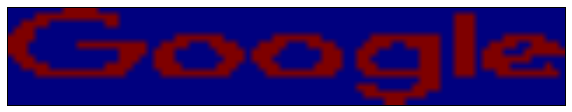

In [5]:
plt.figure(figsize=(10,10))
plt.imshow(paint)
fig = plt.gca()
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

In [165]:
dim = np.array(dimstr, np.int32)
print dim

[5 7]


In [166]:
density = paint.sum() / dim.prod()
print density 

0.285714285714


In [172]:
minsize = int(dim.min() * density)
print minsize

1


In [171]:
paint

array([[ 0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  1.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  1.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.]])

In [212]:
indices = np.arange(1,dim.prod()+1).reshape(dim)
print indices

[[ 1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14]
 [15 16 17 18 19 20 21]
 [22 23 24 25 26 27 28]
 [29 30 31 32 33 34 35]]


In [241]:
# Generate the indices, in the test example we can only have sqp(1) so we lose 2 rows and 2 columns, first and last 
# in both cases.

row, col = np.indices((dim[0]-2, dim[1]-2))
centers = indices[row+1, col+1]
centers

array([[ 9, 10, 11, 12, 13],
       [16, 17, 18, 19, 20],
       [23, 24, 25, 26, 27]])

In [390]:
# Test case, let's take the center in cell 9
# We access that center by knowing it is in the second row, so the first row in the center matrix
# And we know that it is the first column

def discrete_kernel(center, paint, minsize):
    dist = np.empty((3,3))
    decay = np.logspace(0,1,minsize+1 )
    
    for xstep in range(-minsize,minsize+1):
        for ystep in range(-minsize,minsize+1):
            dist[1+xstep][1+ystep] = decay[max(abs(xstep), abs(ystep))] * paint[center[0]+xstep][center[1]+ystep]
            
    return dist.sum()

In [391]:
cands = dict()

for row in range(centers.shape[0]):
    for ycoord in centers[row]:
        cands[ycoord] = discrete_kernel([row+minsize, ycoord%7-1], paint, minsize)

print cands

{9: 20.0, 10: 21.0, 11: 51.0, 12: 31.0, 13: 30.0, 16: 30.0, 17: 41.0, 18: 80.0, 19: 41.0, 20: 30.0, 23: 30.0, 24: 31.0, 25: 51.0, 26: 21.0, 27: 20.0}


In [378]:
max(cands, key = cands.get)

18

In [109]:
X = paint.reshape(-1,1)
connectivity = grid_to_graph(*paint.shape)

Compute structured hierarchical clustering...
('Elapsed time: ', 0.5544860363006592)
('Number of pixels: ', 8000)
('Number of clusters: ', 9)


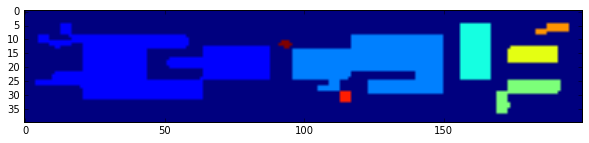

In [112]:
print("Compute structured hierarchical clustering...")
st = time.time()
n_clusters = 9 # number of regions
ward = AgglomerativeClustering(n_clusters=n_clusters,
        linkage='ward', connectivity=connectivity).fit(X)
label = np.reshape(ward.labels_, paint.shape)
print("Elapsed time: ", time.time() - st)
print("Number of pixels: ", label.size)
print("Number of clusters: ", np.unique(label).size)

plt.figure(figsize=(10,10))
plt.imshow(label)

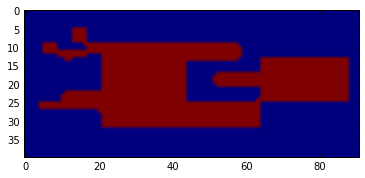

In [113]:
plt.imshow(paint[:,:91])

Compute structured hierarchical clustering...
('Elapsed time: ', 2.2865591049194336)
('Number of pixels: ', 3600)
('Number of clusters: ', 4)


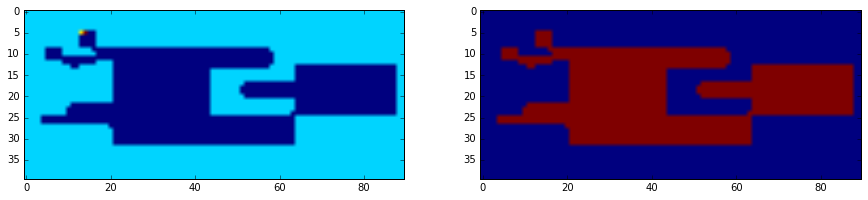

In [124]:
subpaint = paint[:,:90]
X = subpaint.reshape(-1,1)
connectivity = grid_to_graph(*subpaint.shape)

print("Compute structured hierarchical clustering...")
st = time.time()
n_clusters = 4 # number of regions
ward = AgglomerativeClustering(n_clusters=n_clusters,
        linkage='complete', connectivity = connectivity).fit(X)
label = np.reshape(ward.labels_, subpaint.shape)
print("Elapsed time: ", time.time() - st)
print("Number of pixels: ", label.size)
print("Number of clusters: ", np.unique(label).size)

fig=plt.figure()

fig.add_subplot(1,2,1)
plt.imshow(label)

fig.add_subplot(1,2,2)
plt.imshow(subpaint)

fig.set_figheight(15)
fig.set_figwidth(15)

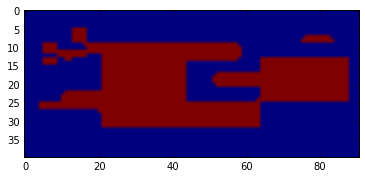

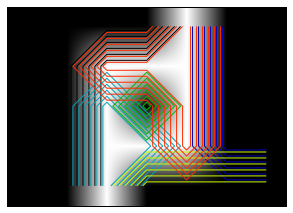

In [409]:
plt.figure(figsize=(5, 5))
plt.imshow(paint, cmap=plt.cm.gray)
for l in range(n_clusters):
    plt.contour(label == l, contours=1,
                colors=[plt.cm.spectral(l / float(n_clusters)), ])
plt.xticks(())
plt.yticks(())
plt.show()